In [1]:
#import
import pandas as pd
import numpy as np
#Read in TU.csv
TU = pd.read_csv("TU.csv", index_col = 'ID')
TU

,train-test,Entry Term (Application),Admit Type,Permanent Postal,Permanent Country,Sex,Ethnicity,Race,Religion,First_Source Origin First Source Date,...,SAT Concordance Score (of SAT R),ACT Concordance Score (of SAT R),ACT Concordance Score (of SAT),Test Optional,SAT I Critical Reading,SAT I Math,SAT I Writing,SAT R Evidence-Based Reading and Writing Section,SAT R Math Section,Decision
ID,,,,,,,,,,,,,,,,,,,,,
1,train,Fall 2017,FY,87507-7944,United States,F,Non Hispanic/Latino,White,Roman Catholic,11/18/2016 5:40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,train,Fall 2019,FY,75082-2652,United States,M,Non Hispanic/Latino,White,NaN,1/30/2017 17:24,...,1320.0,30.0,NaN,NaN,NaN,NaN,NaN,660.0,720.0,0
3,train,Fall 2020,FY,77055-6522,United States,F,Hispanic/Latino,White,Christian,1/31/2019 12:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,train,Fall 2017,FY,98607-8571,United States,F,Non Hispanic/Latino,Asian,NaN,6/15/2015,...,NaN,NaN,NaN,NaN,750.0,770.0,700.0,NaN,NaN,0
5,train,Fall 2019,FY,78681-3451,United States,M,Non Hispanic/Latino,White,Christian,2/19/2018 11:11,...,1290.0,29.0,NaN,NaN,NaN,NaN,NaN,650.0,700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15139,test,Fall 2020,FY,91006-1737,United States,F,Non Hispanic/Latino,Asian,NaN,2/19/2018 11:11,...,1270.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15140,test,Fall 2019,FY,77494-5298,United States,F,Non Hispanic/Latino,Asian,Hindu,2/16/2018 16:31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15141,test,Fall 2020,FY,55443-1016,United States,M,Non Hispanic/Latino,Black or African American,NaN,6/25/2019 12:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [2]:
TU.columns

Index(['train-test', 'Entry Term (Application)', 'Admit Type',
       'Permanent Postal', 'Permanent Country', 'Sex', 'Ethnicity', 'Race',
       'Religion', 'First_Source Origin First Source Date', 'Inquiry Date',
       'Submitted', 'Application Source', 'Decision Plan',
       'Staff Assigned Name', 'Legacy', 'Athlete', 'Sport 1 Sport',
       'Sport 1 Rating', 'Sport 2 Sport', 'Sport 2 Rating', 'Sport 3 Sport',
       'Sport 3 Rating', 'Academic Interest 1', 'Academic Interest 2',
       'First_Source Origin First Source Summary', 'Total Event Participation',
       'Count of Campus Visits', 'School #1 Organization Category',
       'School 1 Code', 'School 1 Class Rank (Numeric)',
       'School 1 Class Size (Numeric)', 'School 1 GPA', 'School 1 GPA Scale',
       'School 1 GPA Recalculated', 'School 2 Class Rank (Numeric)',
       'School 2 Class Size (Numeric)', 'School 2 GPA', 'School 2 GPA Scale',
       'School 2 GPA Recalculated', 'School 3 Class Rank (Numeric)',
       'Sch

In [3]:
#3 Admit Type (removing variables)
print(TU['Admit Type'].isna().sum())
#No NA.
print(TU['Admit Type'].unique())
#No irregular categories.

#Since the data set only has first years (i.e.,only one category), 
# Admit.Type should be removed in the modeling stage.
TU=TU.drop('Admit Type',axis='columns')
TU

0
['FY']


,train-test,Entry Term (Application),Permanent Postal,Permanent Country,Sex,Ethnicity,Race,Religion,First_Source Origin First Source Date,Inquiry Date,...,SAT Concordance Score (of SAT R),ACT Concordance Score (of SAT R),ACT Concordance Score (of SAT),Test Optional,SAT I Critical Reading,SAT I Math,SAT I Writing,SAT R Evidence-Based Reading and Writing Section,SAT R Math Section,Decision
ID,,,,,,,,,,,,,,,,,,,,,
1,train,Fall 2017,87507-7944,United States,F,Non Hispanic/Latino,White,Roman Catholic,11/18/2016 5:40,2/13/2017 19:25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,train,Fall 2019,75082-2652,United States,M,Non Hispanic/Latino,White,NaN,1/30/2017 17:24,NaN,...,1320.0,30.0,NaN,NaN,NaN,NaN,NaN,660.0,720.0,0
3,train,Fall 2020,77055-6522,United States,F,Hispanic/Latino,White,Christian,1/31/2019 12:35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,train,Fall 2017,98607-8571,United States,F,Non Hispanic/Latino,Asian,NaN,6/15/2015,10/18/2016 15:49,...,NaN,NaN,NaN,NaN,750.0,770.0,700.0,NaN,NaN,0
5,train,Fall 2019,78681-3451,United States,M,Non Hispanic/Latino,White,Christian,2/19/2018 11:11,NaN,...,1290.0,29.0,NaN,NaN,NaN,NaN,NaN,650.0,700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15139,test,Fall 2020,91006-1737,United States,F,Non Hispanic/Latino,Asian,NaN,2/19/2018 11:11,NaN,...,1270.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15140,test,Fall 2019,77494-5298,United States,F,Non Hispanic/Latino,Asian,Hindu,2/16/2018 16:31,8/28/2018 9:26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15141,test,Fall 2020,55443-1016,United States,M,Non Hispanic/Latino,Black or African American,NaN,6/25/2019 12:50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
# Permanent Postal
print(TU['Permanent Postal'].isna().sum())
print(TU['Permanent Postal'].unique())
TU = TU.drop('Permanent Postal', axis='columns')
TU

162
['87507-7944' '75082-2652' '77055-6522' ... '77494-5298' '55443-1016'
 '78624-6081']


,train-test,Entry Term (Application),Permanent Country,Sex,Ethnicity,Race,Religion,First_Source Origin First Source Date,Inquiry Date,Submitted,...,SAT Concordance Score (of SAT R),ACT Concordance Score (of SAT R),ACT Concordance Score (of SAT),Test Optional,SAT I Critical Reading,SAT I Math,SAT I Writing,SAT R Evidence-Based Reading and Writing Section,SAT R Math Section,Decision
ID,,,,,,,,,,,,,,,,,,,,,
1,train,Fall 2017,United States,F,Non Hispanic/Latino,White,Roman Catholic,11/18/2016 5:40,2/13/2017 19:25,11/17/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,train,Fall 2019,United States,M,Non Hispanic/Latino,White,NaN,1/30/2017 17:24,NaN,10/18/2018,...,1320.0,30.0,NaN,NaN,NaN,NaN,NaN,660.0,720.0,0
3,train,Fall 2020,United States,F,Hispanic/Latino,White,Christian,1/31/2019 12:35,NaN,10/24/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,train,Fall 2017,United States,F,Non Hispanic/Latino,Asian,NaN,6/15/2015,10/18/2016 15:49,11/2/2016,...,NaN,NaN,NaN,NaN,750.0,770.0,700.0,NaN,NaN,0
5,train,Fall 2019,United States,M,Non Hispanic/Latino,White,Christian,2/19/2018 11:11,NaN,3/5/2019,...,1290.0,29.0,NaN,NaN,NaN,NaN,NaN,650.0,700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15139,test,Fall 2020,United States,F,Non Hispanic/Latino,Asian,NaN,2/19/2018 11:11,NaN,1/1/2020,...,1270.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15140,test,Fall 2019,United States,F,Non Hispanic/Latino,Asian,Hindu,2/16/2018 16:31,8/28/2018 9:26,10/28/2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15141,test,Fall 2020,United States,M,Non Hispanic/Latino,Black or African American,NaN,6/25/2019 12:50,NaN,11/1/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
#Column 5 Permanent Country
print(TU['Permanent Country'].isna().sum())
#1 missing value in this column 
print(TU['Permanent Country'].unique())
# No duplicated countries are present
TU[TU['Permanent Country'].isna()]["Citizenship Status"]
TU.at[11147, 'Permanent Country'] = "United States"
TU.iloc[11147]['Permanent Country']
#TU - runs code to check if data is cleaned 

1
['United States' 'Jamaica' 'Costa Rica' 'China' 'Vietnam' 'Nicaragua'
 'Spain' 'India' 'Luxembourg' 'Nepal' 'Ecuador' 'Honduras' 'Cameroon'
 'Mexico' 'Canada' 'Singapore' 'Bangladesh' 'Pakistan'
 'United Arab Emirates' 'Uzbekistan' 'France' 'Thailand' 'Venezuela'
 'Hong Kong S.A.R.' 'Switzerland' 'Tanzania' 'Brazil' 'El Salvador'
 'Indonesia' 'Mozambique' 'Turkey' 'Czech Republic' 'Taiwan' 'Japan'
 'South Korea' 'Colombia' "Cote D'Ivoire" 'Jordan' 'Kazakhstan' 'Panama'
 'Belgium' 'United Kingdom' 'Nigeria' 'Peru' 'Lebanon' 'Cayman Islands'
 'Guatemala' 'Argentina' 'Bolivia' 'Italy' 'Poland' 'Trinidad and Tobago'
 'New Zealand' 'Ethiopia' 'Kenya' 'Montenegro' 'Germany' 'Saudi Arabia'
 'Philippines' 'Greece' 'Ireland' 'Georgia' 'Belize' 'Netherlands'
 'Palestine' 'Bosnia and Herzegovina' 'Cyprus' 'Norway' 'Russia'
 'Barbados' 'Kuwait' 'Uruguay' 'Morocco' 'Ghana' 'The Bahamas'
 'South Africa' 'Paraguay' 'Cambodia' 'Malaysia' 'Dominica' 'Iran'
 'Lithuania' 'Iceland' 'Egypt' 'Australia' n

nan

In [6]:
#Column 6 Sex - no need for operations (very consistent formatting) 


In [7]:
#Column 7 - Ethnicity (handling missing values)
print(TU['Ethnicity'].isna().sum())
# This column has 227 missing values 
print(TU['Ethnicity'].unique())
# No irregular categories
# Replace singular missing values with Not Specified
TU['Ethnicity'].fillna("Not Specified", inplace = True)
print(TU['Ethnicity'].isna().sum())

227
['Non Hispanic/Latino' 'Hispanic/Latino' nan]
0


In [8]:
# Column 8 - Race (similar process as column 7)

# Handling missing values
print(TU['Race'].isna().sum())
#555 missing values in this column 
print(TU['Race'].unique())
# No irregular categories
# Fill nas as "Not specified"
TU['Race'].fillna("Not Specified", inplace = True)
TU['Race'].value_counts()

555
['White' 'Asian' 'Black or African American' 'Asian, White' nan
 'American Indian or Alaska Native, Black or African American, White'
 'Black or African American, White'
 'Asian, Black or African American, White'
 'American Indian or Alaska Native'
 'American Indian or Alaska Native, White'
 'American Indian or Alaska Native, Asian, White'
 'Asian, Black or African American' 'Native Hawaiian or Other Pacific'
 'Asian, Native Hawaiian or Other Pacific'
 'Native Hawaiian or Other Pacific, White'
 'Asian, Native Hawaiian or Other Pacific, White'
 'American Indian or Alaska Native, Black or African American'
 'American Indian or Alaska Native, Asian'
 'Black or African American, Native Hawaiian or Other Pacific'
 'American Indian or Alaska Native, Native Hawaiian or Other Pacific'
 'American Indian or Alaska Native, Asian, Black or African American, White'
 'Asian, Black or African American, Native Hawaiian or Other Pacific, White'
 'American Indian or Alaska Native, Asian, Black or Af

White                                                                                                          10316
Asian                                                                                                           2483
Black or African American                                                                                        760
Not Specified                                                                                                    555
Asian, White                                                                                                     458
American Indian or Alaska Native, White                                                                          155
Black or African American, White                                                                                 144
American Indian or Alaska Native                                                                                 121
Asian, Black or African American                                

In [9]:
# Column 8 - augmenting existing data points
RaceList = list(TU['Race'].value_counts()[:7].index)
TU['Race'] = \
TU['Race'].apply(lambda x: 'Others' if x not in RaceList else x)
TU['Race'].value_counts()

# Combine levels into a multiracial category
TU['Race'] = TU['Race'].apply(lambda x: 'Multiracial' if x in ['Asian, White', 'American Indian or Alaska Native, White', 'Black or African American, White'] else x)
TU['Race'].value_counts()

White                        10316
Asian                         2483
Black or African American      760
Multiracial                    757
Not Specified                  555
Others                         272
Name: Race, dtype: int64

In [10]:
# Column 9 - Religion
print(TU['Religion'].isna().sum())
#5483 NAs
print(TU['Religion'].unique())
# no irregular categories
# Replace NA values with not specified 
TU['Religion'].fillna("Not specified", inplace=True)
TU['Religion'].value_counts()

# Combine similar levels into one level
TU['Religion'] = \
TU['Religion'].apply(lambda x: 'Christian' if x in ['Bible Churches', 'Christian Reformed', 'Christian Scientist', 'Church of Christ', 'Church of God'] else x)
TU['Religion'] = \
TU['Religion'].apply(lambda x: 'Presbyterian' if x == 'Presbyterian Church of America' else x)
TU['Religion'].value_counts()

5483
['Roman Catholic' nan 'Christian' 'Presbyterian' 'Islam/Muslim' 'Jewish'
 'Hindu' 'None' 'Baptist' 'Methodist' 'Jain' 'Anglican' 'Lutheran' 'Other'
 'Assembly of God' 'Non-Denominational' 'Bible Churches'
 'Christian Reformed' 'Unitarian' 'Eastern Orthodox' 'Episcopal'
 'United Methodist' 'Church of Christ' 'Pentecostal'
 'Lutheran-Missouri Synod' 'Protestant' 'Mormon-Latter Day Saints'
 'Buddhism' 'Sikh' 'Church of God' 'Presbyterian Church of America'
 'Evangelical' 'Southern Baptist' 'Society of Friends (Quaker)'
 'United Church of Christ' "Jehovah's Witnesses" 'Mennonite'
 'Christian Scientist' 'Jewish Messianic' "Baha'I" 'Coptic Church (Egypt)'
 'Zoroastrian' 'Independent' 'Church of the Nazarene']


Not specified                  5483
Roman Catholic                 2755
Christian                      1820
None                            839
Methodist                       680
Baptist                         644
Presbyterian                    447
Hindu                           375
Other                           296
Jewish                          279
Anglican                        278
Lutheran                        255
Islam/Muslim                    241
Non-Denominational              153
Buddhism                        108
Episcopal                        92
Eastern Orthodox                 86
Pentecostal                      65
Unitarian                        42
Protestant                       29
Mormon-Latter Day Saints         28
Evangelical                      24
Sikh                             22
Jain                             17
Assembly of God                  15
United Church of Christ          12
Southern Baptist                 12
United Methodist            

In [11]:
# Column 9 - Religion (augments existing variables continued)
ReligionList = list(TU['Religion'].value_counts()[:14].index)
TU['Religion'] = \
TU['Religion'].apply(lambda x: 'Other' if x not in ReligionList else x)
TU['Religion'].value_counts()

# Combine Presbyterian, Anglican, Methodist, Baptist, and Lutheran into Protestant category
TU['Religion'] = TU['Religion'].apply(lambda x: 'Protestant' if x in ['Presbyterian', 'Anglican', 'Methodist', 'Baptist', 'Lutheran'] else x)
# Combine Non-Denominational with Christian
TU['Religion'] = TU['Religion'].apply(lambda x: 'Christian' if x in ['Non-Denominational', 'Christian'] else x)
TU['Religion'].value_counts()

# Combine all Christian denominations
TU['Religion'] = TU['Religion'].apply(lambda x: 'Christian' if x in ['Roman Catholic', 'Protestant', 'Christian', 'Church of Christ'] else x)
TU['Religion'].value_counts()

Christian        7032
Not specified    5483
Other             894
None              839
Hindu             375
Jewish            279
Islam/Muslim      241
Name: Religion, dtype: int64

In [12]:
# Column 10 - First Source First Source Date
print(TU['First_Source Origin First Source Date'].isna().sum())
# no missing values
TU['First_Source Origin First Source Date'] = pd.to_datetime(TU['First_Source Origin First Source Date'], errors='coerce').dt.date
TU['First_Source Origin First Source Date']

0


ID
1        2016-11-18
2        2017-01-30
3        2019-01-31
4        2015-06-15
5        2018-02-19
            ...    
15139    2018-02-19
15140    2018-02-16
15141    2019-06-25
15142    2016-02-03
15143    2017-01-30
Name: First_Source Origin First Source Date, Length: 15143, dtype: object

In [13]:
# Column 11 - Inquiry Date 
# convert to date format
TU['Inquiry Date'] = pd.to_datetime(TU['Inquiry Date'], errors='coerce').dt.date
TU['Inquiry Date']

ID
1        2017-02-13
2               NaT
3               NaT
4        2016-10-18
5               NaT
            ...    
15139           NaT
15140    2018-08-28
15141           NaT
15142    2017-09-10
15143    2018-02-19
Name: Inquiry Date, Length: 15143, dtype: object

In [14]:
# Column 12 - Submitted (same process as column 11)
TU['Submitted'] = pd.to_datetime(TU['Submitted'], errors='coerce').dt.date
TU['Submitted']

ID
1        2016-11-17
2        2018-10-18
3        2019-10-24
4        2016-11-02
5        2019-03-05
            ...    
15139    2020-01-01
15140    2018-10-28
15141    2019-11-01
15142    2017-10-11
15143    2018-10-16
Name: Submitted, Length: 15143, dtype: object

In [15]:
#Column10-12
#After viewing Column10-12, it would be interesting to see
#whether the differences between submission date and First_Source date
#the differences between submission date and inquiry date affect the response.
#So let's calculate the time difference between submission date and first_source date.
TU['Submit_FirstSource'] = \
(TU['Submitted']-TU['First_Source Origin First Source Date']).astype('timedelta64[W]')
TU['Submit_Inquiry']= \
(TU['Submitted']-TU['Inquiry Date']).astype('timedelta64[W]')
#There are NAs in Inquiry.Date, 
#thus leading to NAs in Submit_Inquiry.
#Impute NAs in Submit_Inquiry with median values.
TU.Submit_Inquiry.fillna(TU['Submit_Inquiry'].median(),inplace=True)
TU.Submit_Inquiry.isna().sum()
#Remove Column10-12 in the modeling stage since they are used to construct new variables.   
TU.drop(['First_Source Origin First Source Date','Submitted','Inquiry Date'], \
        axis='columns', inplace=True)

TU[['Submit_FirstSource', 'Submit_Inquiry']]

,Submit_FirstSource,Submit_Inquiry
ID,,
1,-1.0,-13.0
2,89.0,11.0
3,38.0,11.0
4,72.0,2.0
5,54.0,11.0
...,...,...
15139,97.0,11.0
15140,36.0,8.0
15141,18.0,11.0


In [16]:
# Columns 13 and 14- no data cleaning 

In [17]:
# Column 15 - Staff Assigned Name 
TU.drop(['Staff Assigned Name'], axis='columns', inplace=True)

In [18]:
# Column 16 - Legacy
print(TU['Legacy'].isna().sum())
# 13658 missing values in data 
print(TU['Legacy'].unique())
# No irredular categories
# Replace missing values with "No Legacy"
TU['Legacy'].fillna("No Legacy", inplace=True)

TU['Legacy'].value_counts() # Counts the values of all categories in this column
TU['Legacy'] = TU['Legacy'].apply(lambda x: 'Legacy, Opt Out' if x not in ['Legacy', 'No Legacy'] else x)
TU['Legacy'].value_counts()

# Combine Legacy and Legacy, Opt Out
TU['Legacy'] = TU['Legacy'].apply(lambda x: 'Legacy' if x in ['Legacy', 'Legacy, Opt Out'] else x)
TU['Legacy'].value_counts()

13658
[nan 'Legacy' 'Legacy, Opt Out' 'Fine Arts, Legacy' 'Athlete, Legacy'
 'Fine Arts, Legacy, VIP' 'Legacy, VIP' 'Athlete, Legacy, VIP'
 'Athlete, Legacy, Opt Out' 'Legacy, Opt Out, VIP'
 'Fine Arts, Legacy, Opt Out' 'Athlete, Legacy, Opt Out, VIP'
 'Athlete, Fine Arts, Legacy' 'Fine Arts, Legacy, Opt Out, VIP'
 'Athlete, Fine Arts, Legacy, VIP'
 'Athlete, Fine Arts, Legacy, Opt Out, VIP']


No Legacy    13658
Legacy        1485
Name: Legacy, dtype: int64

In [19]:
# Column 17 - Athlete
print(TU['Athlete'].isna().sum())
# 13120 missing values in column
print(TU['Athlete'].unique())
# No irregular categories
# fill missing values with Non-Athlete
TU['Athlete'].fillna("Non-Athlete", inplace=True)

TU['Athlete'].value_counts()  # Counts all values from each category
TU['Athlete'] = TU['Athlete'].apply(lambda x: 'Athlete, Opt Out' if x not in ['Athlete', 'Non-Athlete'] else x)
TU['Athlete'].value_counts()

# Combine Athlete and Athlete, Opt Out
TU['Athlete'] = TU['Athlete'].apply(lambda x: 'Athlete' if x in ['Athlete', 'Athlete, Opt Out'] else x)
TU['Athlete'].value_counts()

13120
[nan 'Athlete, Opt Out' 'Athlete' 'Athlete, Fine Arts' 'Athlete, Legacy'
 'Athlete, Legacy, VIP' 'Athlete, Legacy, Opt Out' 'Athlete, VIP'
 'Athlete, Legacy, Opt Out, VIP' 'Athlete, Fine Arts, Opt Out'
 'Athlete, Opt Out, VIP' 'Athlete, Fine Arts, Legacy'
 'Athlete, Fine Arts, Legacy, VIP'
 'Athlete, Fine Arts, Legacy, Opt Out, VIP']


Non-Athlete    13120
Athlete         2023
Name: Athlete, dtype: int64

In [20]:
# Column 18 - Sport 1 sport
print(TU['Sport 1 Sport'].isna().sum())
# 13120 missing values in original column 
print(TU['Sport 1 Sport'].unique())
# no categories that don't make sense
# Replace missing values with "No Sport"
TU['Sport 1 Sport'].fillna("No Sport", inplace=True)

# Group sports for males and females separately
TU['Sport 1 Sport'] = TU['Sport 1 Sport'].str.replace('Women','')
TU['Sport 1 Sport'] = TU['Sport 1 Sport'].str.replace('Men','')
print(TU['Sport 1 Sport'].unique())
# Look up sports that Trinity is known for

TU['Sport 1 Sport'].value_counts()
# Combine sports
TU['Sport 1 Sport'] = TU['Sport 1 Sport'].apply(lambda x: 'Swimming' if x in ['Swimming', 'Diving'] else x)
TU['Sport 1 Sport'].value_counts()

13120
[nan 'Baseball' 'Football' 'Track Women' 'Tennis Women'
 'Cross Country Men' 'Tennis Men' 'Soccer Men' 'Golf Women' 'Soccer Women'
 'Basketball Men' 'Softball' 'Swimming Women' 'Cross Country Women'
 'Track Men' 'Golf Men' 'Swimming Men' 'Volleyball' 'Basketball Women'
 'Diving Women' 'Diving Men']
['No Sport' 'Baseball' 'Football' 'Track ' 'Tennis ' 'Cross Country '
 'Soccer ' 'Golf ' 'Basketball ' 'Softball' 'Swimming ' 'Volleyball'
 'Diving ']


No Sport          13120
Football            498
Soccer              265
Cross Country       248
Track               227
Swimming            173
Baseball            172
Basketball          157
Tennis              107
Softball             54
Golf                 47
Volleyball           47
Diving               28
Name: Sport 1 Sport, dtype: int64

In [21]:
# Column 19 - Sport 1 Rating 
print(TU['Sport 1 Rating'].isna().sum())
# 13120 missing values in original column 
# Fill missing values with No Sport as with Column 18
TU['Sport 1 Rating'].fillna("No Sport", inplace=True)
TU['Sport 1 Rating'].unique()

13120


array(['No Sport', 'Franchise', 'Blue Chip', 'Varsity'], dtype=object)

In [22]:
# Column 20 - Sport 2 Sport
print(TU['Sport 2 Sport'].isna().sum())
#14513 missing values in Column 20
TU['Sport 2 Sport'].fillna("No 2ndSport", inplace=True)
TU['Sport 2 Sport'].value_counts()   # counts numbers of values in each category
TU['Sport 2 Sport'] = TU['Sport 2 Sport'].apply(lambda x: '2ndSport' if x != 'No 2ndSport' else x)
print(TU['Sport 2 Sport'].unique())
TU['Sport 2 Sport'].value_counts()

14513
['No 2ndSport' '2ndSport']


No 2ndSport    14513
2ndSport         630
Name: Sport 2 Sport, dtype: int64

In [23]:
# Column 21 - Sport 2 Rating 
print(TU['Sport 2 Rating'].isna().sum())
# 15085 missing values
print(TU['Sport 2 Rating'].unique())
# Remove this column in the modeling stage
TU.drop('Sport 2 Rating', axis='columns', inplace=True)

15085
[nan 'Blue Chip' 'Varsity' 'Franchise']


In [24]:
# Column 22 - Sport 3 Sport 
print(TU['Sport 3 Sport'].isna().sum())
# 14907 missing values - replace with category No 3rdSport
TU['Sport 3 Sport'].fillna("No 3rdSport", inplace=True)
TU['Sport 3 Sport'].value_counts()

TU['Sport 3 Sport'] = TU['Sport 3 Sport'].apply(lambda x: "3rdSport" if x != "No 3rdSport" else x)
print(TU['Sport 3 Sport'].unique())
TU['Sport 3 Sport'].value_counts()

14907
['No 3rdSport' '3rdSport']


No 3rdSport    14907
3rdSport         236
Name: Sport 3 Sport, dtype: int64

In [25]:
# Column 23 - Sport 3 Rating 
print(TU['Sport 3 Rating'].isna().sum())
# 15140 missing values in Column 23
print(TU['Sport 3 Rating'].unique())
# This column would not provide enough information. This column should be removed
TU.drop('Sport 3 Rating', axis = 'columns', inplace=True)

15140
[nan 'Varsity']


In [26]:
# Column 24 - Academic Interest 1
print(TU['Academic Interest 1'].isna().sum())
#6 NAs.
print(TU['Academic Interest 1'].unique())
#Most of the NAs for Academic.Interest.1 have a value for Academic.Interest.2
#We may assign the corresponding values in Academic.Interest.2 
#to NAs in Academic.Interest.1 if Academic.Interest.2 has a value.
#TU[TU['Academic Interest 1'].isna()]['Academic Interest 2']

for i,b in TU[TU['Academic Interest 1'].isna()].iterrows():
    TU['Academic Interest 1'][i]=TU['Academic Interest 2'][i]
    
#For the remaining NAs in Academic.Interest.1, assign Undecided.
TU['Academic Interest 1'].fillna('Undecided', inplace=True)




6
['Biology' 'Engineering Science' 'Psychology' 'Neuroscience'
 'Computer Science' 'English' 'Mathematics' 'Education' 'Music'
 'Undecided' 'Business' 'Geosciences' 'Pre-Law' 'Biochemistry' 'Finance'
 'Pre-Medical' 'Political Science' 'Business - Communication Management'
 'Economics' 'Business - Accounting' 'Entrepreneurship' 'Sociology'
 'Environmental Studies' 'Chemistry' 'Mathematical Finance'
 'Business - Sport Management' 'History' 'International Studies'
 'Biochemistry & Molecular Biology' 'Business - Management'
 'Communication' 'Anthropology' 'Business - Marketing' 'Linguistics'
 'Philosophy' 'Business - International Business'
 'Business Analytics & Technology' 'Art' 'French'
 'Business - Management Information Systems' 'Physics' 'Urban Studies'
 'Chinese' 'Nursing' 'Business Legal Studies' 'Human Communication'
 'Comparative Literature' 'Creative Writing'
 'Ancient Mediterranean Studies' 'Art History' 'Architectural Studies'
 'Film Studies' 'Theatre' 'Music Education' 'Pre-D

/var/folders/0m/l4prbb_56q1gl8j3h3qzryb40000gn/T/ipykernel_15001/4035662498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TU['Academic Interest 1'][i]=TU['Academic Interest 2'][i]


In [27]:
# Column 24 (continued) - Group minor categories into 1
#Group Business related options into "Business".
TU['Academic Interest 1'] = \
TU['Academic Interest 1'].apply(lambda x: 'Business' if x in['Finance','Entrepreneurship'] else x)



#Group options with a low number of cases (< 100 cases) into "Others".
Majorlist=list(TU['Academic Interest 1'].value_counts()[:30].index)
TU['Academic Interest 1'] = \
TU['Academic Interest 1'].apply(lambda x: 'Others' if x not in Majorlist else x)
TU['Academic Interest 1'].value_counts()

# Combine based on schools
TU['Academic Interest 1'] = TU['Academic Interest 1'].apply(lambda x: 'Arts and Humanities' if x in ['English', 'History', 'Art', 'Music'] else x)
TU['Academic Interest 1'] = TU['Academic Interest 1'].apply(lambda x: 'Social Sciences and Civic Engagement' if x in ['Economics', 'Environmental Studies', 'Education', 'Communication', 'Political Science', 'International Studies'] else x)
TU['Academic Interest 1'] = TU['Academic Interest 1'].apply(lambda x: 'School of Science' if x in ['Biology', 'Engineering Science', 'Computer Science', 'Mathematics', 'Neuroscience', 'Biochemistry', 'Biochemistry & Molecular Biology', 'Physics', 'Psychology', 'Mathematics', 'Chemistry'] else x)
TU['Academic Interest 1'] = TU['Academic Interest 1'].apply(lambda x: 'Business' if x in ['Business - Accounting', 'Business - Management','Business - Marketing', 'Business', 'Business - International Business', 'Business - Communication Management', 'Business Analytics & Technology'] else x)
TU['Academic Interest 1'].value_counts()

School of Science                       6474
Business                                2682
Social Sciences and Civic Engagement    1896
Pre-Medical                             1581
Others                                   880
Arts and Humanities                      728
Undecided                                647
Pre-Law                                  255
Name: Academic Interest 1, dtype: int64

In [28]:
# Column 25 - Academic Interest 2
print(TU['Academic Interest 2'].isna().sum())
#159 NAs.
#Replace repeated academic interests with Undecided, 
#then make NAs Undecided
TU['Academic Interest 2'].fillna('Undecided', inplace=True)

#Group Business related options into "Business".
TU['Academic Interest 2'] = \
TU['Academic Interest 2'].apply(lambda x: 'Business' if x in['Finance','Entrepreneurship'] else x)


#Group options with a low number of cases (< 100 cases) into "Others".
Majorlist=list(TU['Academic Interest 2'].value_counts()[:37].index)
TU['Academic Interest 2'] = \
TU['Academic Interest 2'].apply(lambda x: 'Others' if x not in Majorlist else x)
print(TU['Academic Interest 2'].unique())
TU['Academic Interest 2'].value_counts()

# Combine variables like we did in Academic Interest 1
TU['Academic Interest 2'] = TU['Academic Interest 2'].apply(lambda x: 'Business' if x in ['Business','Business - Management', 'Business - International Business', 'Business - Non-Accounting', 'Business - Communication Management', 'Business - Marketing', 'Business - Sport Management'] else x)
TU['Academic Interest 2'] = TU['Academic Interest 2'].apply(lambda x: 'Liberal Arts' if x in ['English', 'History', 'Communication', 'Music', 'Art', 'Environmental Studies', 'Education', 'Spanish', 'Anthropology', 'Philosophy', 'Creative Writing'] else x)
TU['Academic Interest 2'] = TU['Academic Interest 2'].apply(lambda x: 'Computer Science' if x in ['Engineering Science', 'Computer Science'] else x)
TU['Academic Interest 2'] = TU['Academic Interest 2'].apply(lambda x: 'Biochemistry' if x in ['Biochemistry', 'Biochemistry & Molecular Biology'] else x)
TU['Academic Interest 2'] = TU['Academic Interest 2'].apply(lambda x: 'Other STEM' if x in ['Psychology', 'Neuroscience', 'Mathematics', 'Chemistry', 'Physics'] else x)
TU['Academic Interest 2'].value_counts()

159
['Others' 'Computer Science' 'Biology' 'Engineering Science'
 'Biochemistry & Molecular Biology' 'Environmental Studies' 'English'
 'Spanish' 'Psychology' 'Economics' 'Business - Marketing' 'Physics'
 'Undecided' 'Mathematics' 'Business - Communication Management'
 'Business - Accounting' 'International Studies' 'Neuroscience'
 'Business Analytics & Technology' 'Business' 'Political Science'
 'Sociology' 'Biochemistry' 'Pre-Medical'
 'Business - International Business' 'Communication' 'Pre-Law'
 'Business - Management' 'Anthropology' 'Business - Sport Management'
 'Music' 'History' 'Creative Writing' 'Mathematical Finance' 'Chemistry'
 'Education' 'Philosophy' 'Art']


Business                           2604
Other STEM                         2303
Liberal Arts                       1895
Biology                            1159
Biochemistry                       1107
Others                             1089
Computer Science                   1081
Pre-Medical                         850
Undecided                           643
Political Science                   575
Economics                           490
Pre-Law                             368
International Studies               287
Sociology                           226
Business - Accounting               206
Business Analytics & Technology     156
Mathematical Finance                104
Name: Academic Interest 2, dtype: int64

In [29]:
# Column 26 - First_Source Origin First Source Summary
print(TU['First_Source Origin First Source Summary'].isna().sum())
#No NAs.
print(TU['First_Source Origin First Source Summary'].unique())
#No irregular values

#Group options with a low number of cases (< 100) into "Other Sources".
Majorlist=list(TU['First_Source Origin First Source Summary'].value_counts()[:17].index)

TU['First_Source Origin First Source Summary'] = \
TU['First_Source Origin First Source Summary'].apply(lambda x: 'Others' if x not in Majorlist else x)
print(TU['First_Source Origin First Source Summary'].unique())
TU['First_Source Origin First Source Summary'].value_counts()


0
['CAP' 'CBINQ' 'OEVNT' 'OAPP' 'PSAT' 'CF' 'SATR' 'HSV' 'WEBCA' 'HOBS'
 'VST' 'YUVST' 'SRCH' 'WEBTU' 'ACTPL' 'ACT' 'ATH' 'SIB' 'APPTX' 'CAPIQ'
 'NICHE' 'CLNIQ' 'TVINT' 'NHI' 'SAT' 'AP' 'TIF' 'TVOTH' 'OTH' 'ATHWB'
 'DOC' 'ALUM' 'GRP' 'REF' 'EM' 'DBT' 'RCPT' 'CHEGG' 'MPC' 'MAIL' 'CLNAP'
 'TFL' 'ATS' 'EXPL' 'LVCHT' 'HIGH' 'TEL' 'DUOL' 'WEBOT' 'APCU']
['CAP' 'CBINQ' 'OEVNT' 'OAPP' 'PSAT' 'CF' 'SATR' 'HSV' 'Others' 'VST'
 'YUVST' 'SRCH' 'WEBTU' 'ACT' 'ATH' 'SIB' 'CAPIQ' 'TIF']


CBINQ     7070
OAPP      1521
SRCH       764
PSAT       755
Others     748
VST        675
CF         551
WEBTU      513
CAPIQ      463
CAP        426
ACT        284
HSV        255
ATH        218
TIF        194
SATR       190
SIB        186
YUVST      178
OEVNT      152
Name: First_Source Origin First Source Summary, dtype: int64

In [30]:
# Column 27 - Total Event Participation
print(TU['Total Event Participation'].isna().sum())
#No NAs.
print(TU['Total Event Participation'].unique())

#Convert Total Event Participation 

TU['Total Event Participation'] = TU['Total Event Participation'].astype('int64')

0
[0 1 2 4 3 5]


In [31]:
# Column 28 - Count of Campus Visits
print(TU['Count of Campus Visits'].isna().sum())
#No NAs.
print(TU['Count of Campus Visits'].unique())
# group 5, 6, and 8 into '4 or more'.
# TU['Count of Campus Visits']= TU['Count of Campus Visits'].apply(lambda x: '4 or more' if x in [5,6,8] else x)
# TU['Count of Campus Visits'].unique()


TU['Count of Campus Visits'] = TU['Count of Campus Visits'].astype('int64')


0
[5 0 2 1 3 4 6 8]


In [32]:
# Column 29 - School 1 Organization Category 
print(TU['School #1 Organization Category'].isna().sum())
#38  NAs.
print(TU['School #1 Organization Category'].unique())
#Only 16 cases belong to College but 15089 cases belong to High School.
#Remove this variable.
TU.drop('School #1 Organization Category', axis='columns', inplace=True)

38
['High School' nan 'College']


In [33]:
# Column 30 - School 1 Code
print(TU['School 1 Code'].isna().sum())
#11879 NAs.
print(TU['School 1 Code'].unique())
#School Code will not matter much to produce insightful information.
#Additionally, there are 11879 missing values.
#so remove this column in the modeling stage.
TU.drop('School 1 Code', axis='columns', inplace=True)

11897
[    nan 441750. 390324. ... 447335. 263055.  52117.]


In [34]:
# Column 31 - School 1 Class Rank (Numeric)
print(TU['School 1 Class Rank (Numeric)'].isna().sum())
#8136 NAs.

8136


In [35]:
# Column 32 - School 1 Class Size (Numeric)
print(TU['School 1 Class Size (Numeric)'].isna().sum())

#8136 NAs.
#Percentage rank can more accurately reflect a student's academic performance
#than numeric rank. 

#New Column - School 1 Top Percent in Class

TU['School 1 Top Percent in Class'] =\
100 *(TU['School 1 Class Rank (Numeric)']/TU['School 1 Class Size (Numeric)'])
#remove Column31 and Column32
TU.drop(['School 1 Class Rank (Numeric)','School 1 Class Size (Numeric)'], axis='columns',
       inplace=True)

print(TU['School 1 Top Percent in Class'].isna().sum())
# #Impute the 8136 NAs based on Academic.Index column. 
# #Since we need to handle NAs in School.1.Top.Percent.in.Class
# #according Academic.Index, first let's see whether Academic Index needs to cleaned.
print(TU['Academic Index'].isna().sum())
#829 NAs.
print(TU['Academic Index'].unique())
#No questionable level.
#Impute 829 NAs with the most common level.
TU['Academic Index'].fillna(3,inplace=True)
print(TU['Academic Index'].unique())
#No missing values in Academic Index now.
#Impute missing values in School 1 Top Percent in Class based on Academic.Index.

# clean_data <- rbind(clean_index_1, clean_index_2, clean_index_3, clean_index_4, clean_index_5)
# #Remove index dataframes
# rm(clean_index_1, clean_index_2, clean_index_3, clean_index_4, clean_index_5)
# #Later when implementing KNN method, I will use mutate()
# #function to convert categorical variables to numeric variables, which ignores
# #grouping variables. Therefore, to ensure Academic.Index will be converted into
# #a numeric variable, I will ungroup clean_data.
# clean_data <- clean_data %>% ungroup()
# clean_data$Academic.Index <- as.factor(clean_data$Academic.Index)

8136
8136
829
[ 3.  2.  4.  1.  5. nan]
[3. 2. 4. 1. 5.]


In [36]:
grouped=TU.groupby('Academic Index')
average=grouped.mean('School 1 Top Percent in Class')
average['School 1 Top Percent in Class']

Academic Index
1.0     4.560086
2.0     8.519419
3.0    16.224847
4.0    29.182240
5.0    34.850230
Name: School 1 Top Percent in Class, dtype: float64

In [37]:
for i,b in TU.iterrows():
   # print(i,b)
    if (TU['Academic Index'][i]== 1.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
        TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][1.0]
    elif (TU['Academic Index'][i]== 2.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
            TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][2.0]
    elif (TU['Academic Index'][i]== 3.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
            TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][3.0]
    elif (TU['Academic Index'][i]== 4.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
            TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][4.0]
    elif (TU['Academic Index'][i]== 5.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
            TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][5.0]

print(TU['School 1 Top Percent in Class'].isna().sum())

/var/folders/0m/l4prbb_56q1gl8j3h3qzryb40000gn/T/ipykernel_15001/2428932017.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][4.0]
/var/folders/0m/l4prbb_56q1gl8j3h3qzryb40000gn/T/ipykernel_15001/2428932017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][1.0]
/var/folders/0m/l4prbb_56q1gl8j3h3qzryb40000gn/T/ipykernel_15001/2428932017.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

0


In [38]:
# Column 33 - School 1 GPA
# This column is irrelevant, so remove from Data frame
TU.drop('School 1 GPA', axis='columns', inplace=True)

In [39]:
# Column 34 - School 1 GPA Scale 
# This column is irrelevant, so remove from Data frame
TU.drop('School 1 GPA Scale', axis='columns', inplace=True)

In [40]:
# Column 35 - School 1 GPA Recalculated 
print(TU['School 1 GPA Recalculated'].isna().sum())
#0 NAs.
TU['School 1 GPA Recalculated'].skew()
#Check skewness


0


-0.929959273527639

In [41]:
# Column 36 - School 2 Class Rank
# Same as column 31
print(TU['School 2 Class Rank (Numeric)'].isna().sum())
#15143 NAs.

15143


In [42]:
# Column 37 - School 2 Class Size
# Same thing as Column 32 
print(TU['School 2 Class Size (Numeric)'].isna().sum())

#8136 NAs.
#Percentage rank can more accurately reflect a student's academic performance
#than numeric rank. 

#New Column - School 1 Top Percent in Class

TU['School 2 Top Percent in Class'] =\
100 *(TU['School 2 Class Rank (Numeric)']/TU['School 2 Class Size (Numeric)'])
#remove Column31 and Column32
TU.drop(['School 2 Class Rank (Numeric)','School 2 Class Size (Numeric)'], axis='columns',
       inplace=True)

print(TU['School 2 Top Percent in Class'].isna().sum())
# #Impute the 8136 NAs based on Academic.Index column. 
# #Since we need to handle NAs in School.1.Top.Percent.in.Class
# #according Academic.Index, first let's see whether Academic Index needs to cleaned.
print(TU['Academic Index'].isna().sum())
#829 NAs.
print(TU['Academic Index'].unique())
#No questionable level.
#Impute 829 NAs with the most common level.
TU['Academic Index'].fillna(3,inplace=True)
print(TU['Academic Index'].unique())
#No missing values in Academic Index now.
#Impute missing values in School 1 Top Percent in Class based on Academic.Index.

# clean_data <- rbind(clean_index_1, clean_index_2, clean_index_3, clean_index_4, clean_index_5)
# #Remove index dataframes
# rm(clean_index_1, clean_index_2, clean_index_3, clean_index_4, clean_index_5)
# #Later when implementing KNN method, I will use mutate()
# #function to convert categorical variables to numeric variables, which ignores
# #grouping variables. Therefore, to ensure Academic.Index will be converted into
# #a numeric variable, I will ungroup clean_data.
# clean_data <- clean_data %>% ungroup()
# clean_data$Academic.Index <- as.factor(clean_data$Academic.Index)

15143
15143
0
[3. 2. 4. 1. 5.]
[3. 2. 4. 1. 5.]


In [43]:
grouped=TU.groupby('Academic Index')
average=grouped.mean('School 1 Top Percent in Class')
average['School 1 Top Percent in Class']

Academic Index
1.0     4.560086
2.0     8.519419
3.0    16.224847
4.0    29.182240
5.0    34.850230
Name: School 1 Top Percent in Class, dtype: float64

In [44]:
for i,b in TU.iterrows():
   # print(i,b)
    if (TU['Academic Index'][i]== 1.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
        TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][1.0]
    elif (TU['Academic Index'][i]== 2.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
            TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][2.0]
    elif (TU['Academic Index'][i]== 3.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
            TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][3.0]
    elif (TU['Academic Index'][i]== 4.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
            TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][4.0]
    elif (TU['Academic Index'][i]== 5.0) & (pd.isna(TU['School 1 Top Percent in Class'][i])):
            TU['School 1 Top Percent in Class'][i]= average['School 1 Top Percent in Class'][5.0]

print(TU['School 1 Top Percent in Class'].isna().sum())

0


In [45]:
# Column 38 - School 2 GPA
# Same issues as in Column 33
# This column is irrelevant 
TU.drop('School 2 GPA', axis='columns', inplace=True)

In [46]:
# Column 39 - School 2 GPA Scale 
# Same thing as in Column 34, drop because this column is irrelevant 
TU.drop('School 2 GPA Scale', axis='columns', inplace=True)

In [47]:
# Column 40 - School 2 GPA Recalculated 
print(TU['School 2 GPA Recalculated'].isna().sum())
#15143 NAs.
TU['School 2 GPA Recalculated'].skew()
#Check skewness
# remove this column: as everything is blank
TU.drop('School 2 GPA Recalculated', axis='columns', inplace=True)

15143


In [48]:
# Column 41 - School 3 Class Rank 
print(TU['School 3 Class Rank (Numeric)'].isna().sum())

# Remove this variable as everything is blank making it irrelevant
TU.drop('School 3 Class Rank (Numeric)', axis='columns', inplace=True)

15143


In [49]:
# Column 42 - School 3 Class Size
print(TU['School 3 Class Size (Numeric)'].isna().sum())
# 15143 NAs
# This column is irrelevant, so remove
TU.drop('School 3 Class Size (Numeric)', axis='columns', inplace=True)

15143


In [50]:
# Column 43 - School 3 GPA
print(TU['School 3 GPA'].isna().sum())
# All points in this column are blank, making this column irrelevant. Remove!
TU.drop('School 3 GPA', axis='columns', inplace=True)

15143


In [51]:
# Column 44 - School 3 GPA Scale 
print(TU['School 3 GPA Scale'].isna().sum())
# 15143 NAs. Since this column has all points blank, remove this column as it is extraneous
TU.drop('School 3 GPA Scale', axis='columns', inplace=True)

15143


In [52]:
# Column 45 - School 3 GPA Recalculated
print(TU['School 3 GPA Recalculated'].isna().sum())
# 15143 NAs. Since this column has all points blank, remove this column as it is extraneous
TU.drop('School 3 GPA Recalculated', axis='columns', inplace=True)

15143


In [53]:
# ACT English column clean up
print(TU['ACT English'].isna().sum())
# 7883 NAs
# Since ACT Composite score is generally a good indicator of ACT scores, scores on each section don't matter in data analysis. Remove this column
TU.drop('ACT English', axis='columns',inplace=True)

7883


In [54]:
# ACT Reading column data clean up
print(TU['ACT Reading'].isna().sum())
# 7883 NAs
# Since ACT composite scores are a good indicator of ACT scores, scores on each section are irrelevant in the data analysis. Remove this column
TU.drop('ACT Reading', axis='columns', inplace= True)

7883


In [55]:
# ACT Math scores data clean up
print(TU['ACT Math'].isna().sum())
#7883 NAs
# Because ACT composite scores are a good indicator for ACT scores, scores on specific sections are irrelevant in the data analysis (remove)
TU.drop('ACT Math', axis='columns', inplace=True)

7883


In [56]:
# ACT Science Reasoning data clean up
print(TU['ACT Science Reasoning'].isna().sum())
# 7883 NAs
# Because ACT composite scores are an indicator for ACT scores, scores on specific sections are irrelevant in the data analysis
TU.drop('ACT Science Reasoning', axis='columns', inplace=True)

7883


In [57]:
# ACT writing data clean up 
print(TU['ACT Writing'].isna().sum())
# 14886 NAs
# Because ACT composite scores are an indicator for ACT scores, scores on specific sections are irrelevant in the data analysis
TU.drop('ACT Writing', axis='columns', inplace=True)

14886


In [58]:
# SAT I CR + M data cleanup
print(TU['SAT I CR + M'].isnull().sum())
# 14569 NAs
# The column is irrelevant,so remove the column
TU.drop('SAT I CR + M', axis='columns', inplace=True)

14569


In [59]:
# SAT I CR
print(TU['SAT I Critical Reading'].isna().sum())
# 14569 NAs
TU = TU.drop('SAT I Critical Reading', axis = 'columns')

14569


In [60]:
# Sat I Math
print(TU['SAT I Math'].isna().sum())
TU = TU.drop('SAT I Math', axis = 'columns')

14569


In [61]:
# SAT I Writing
print(TU['SAT I Writing'].isna().sum())
# 14573 NA
TU = TU.drop('SAT I Writing', axis = 'columns')

14573


In [62]:
# SAT R cleanup
TU['SAT R'] = TU['SAT R Evidence-Based Reading and Writing Section'] + TU['SAT R Math Section']  # SAT R represents the SAT composite score, the sum of the Evidence-Based Reading and Writing Score and the Math Score
TU['SAT R']
# handle missing values
print(TU['SAT R'].isna().sum())
# 8332 NAs - fill nas with not specified values
TU['SAT R'].fillna("0", inplace= True)
# TO do: SAT R generating ACT scores
def sat_to_act(sat):
    try: 
        sat = int(sat)
    except:
        return None
    sat_cutoffs = [1570, 1530, 1490, 1450, 1420, 1390, 1360, 1330, 1300, 1260,1230,1200,1160,1130,1100,1060,1030,990,960,920,880,830,780,730,690,650,620,590]
    for i in range(len(sat_cutoffs)):
        if sat >= sat_cutoffs[i]:
            return 36-i
    return None 
# TODO: comparing SAT values in the data frame in the function
TU = TU.drop('SAT R Evidence-Based Reading and Writing Section', axis = 'columns')
TU = TU.drop('SAT R Math Section', axis = 'columns')
TU['ACT Composite'] = TU['ACT Composite'].fillna(TU['SAT R'].apply(sat_to_act))
TU[['ACT Composite', 'SAT R']]





8332


,ACT Composite,SAT R
ID,,
1,30.0,0
2,30.0,1380.0
3,29.0,0
4,35.0,0
5,29.0,1350.0
...,...,...
15139,NaN,0
15140,33.0,0
15141,26.0,0


In [63]:
#SAT R cleanup continued
TU['SAT R'].value_counts()
# Combine levels based on scoring
TU['SAT R'] = TU['SAT R'].astype('int64')

In [64]:
# Replace missing concordance scores with mean of ACT concordance scores

mean_ACT = round((pd.to_numeric(TU['ACT Composite'], errors = "coerce")).mean(),0)
mean_ACT
   
TU['ACT Composite'] = TU['ACT Composite'].apply(lambda x: mean_ACT if x == "None" else x)
TU['ACT Composite'].fillna(mean_ACT, inplace = True)
TU['ACT Composite']

ID
1        30.0
2        30.0
3        29.0
4        35.0
5        29.0
         ... 
15139    30.0
15140    33.0
15141    26.0
15142    34.0
15143    31.0
Name: ACT Composite, Length: 15143, dtype: float64

In [65]:
# Permanent Geomarket data cleanup
print(TU['Permanent Geomarket'].isna().sum())
# 1 NA 
# Find most frequent geomarket value
TU['Permanent Geomarket'].fillna(TU['Permanent Geomarket'].value_counts().idxmax(), inplace = True)

# Recategorize Geomarkets into regions - TODO: Getting pandas to read excel files (couldn't get it to read excel files)
Regions = pd.read_excel("Regions.xlsx", sheet_name = "State", index_col="State")
print(Regions)
Regions.get('State')

TU['Permanent Geomarket']

# Due to the outputs of Permanent Geomarket not matching Regions, we have to get the state first
TU[['State', 'code']] = TU['Permanent Geomarket'].str.split('-', expand=True)
TU[['State', 'code']]
TU['State']





1
                                     Region
State                                      
Alabama           South, East South Central
Alaska                        West, Pacific
Arizona                      West, Mountain
Arkansas          South, West South Central
California                    West, Pacific
Colorado                     West, Mountain
Connecticut          Northeast, New England
Delaware              South, South Atlantic
D.C.                  South, South Atlantic
Florida               South, South Atlantic
Georgia               South, South Atlantic
Hawaii                        West, Pacific
Idaho                        West, Mountain
Illinois        Midwest, East North Central
Indiana         Midwest, East North Central
Iowa            Midwest, West North Central
Kansas          Midwest, West North Central
Kentucky          South, East South Central
Louisiana         South, West South Central
Maine                Northeast, New England
Maryland              South, S

ID
1        NM
2        TX
3        TX
4        WA
5        TX
         ..
15139    CA
15140    TX
15141    MN
15142    TX
15143    TX
Name: State, Length: 15143, dtype: object

In [66]:
state_dict = {'AL':'Alabama', 'AK':'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
              'CO':'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'D.C.', 'FL': 'Florida', 'GA': 'Georgia', 
             'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS':'Kansas',
             'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MI':'Michigan','ME': 'Maine', 'MD': 'Maryland', 'MN': 'Minnesota', 'MO':'Missouri', 'MS': 'Mississippi', 
             'MT':'Montana','NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY':'New York',
             'NC':'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
             'RI':'Rhode Island', 'SC':'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX':'Texas', 'UT': 'Utah',
             'VT':'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

TU['State'].replace(state_dict, inplace = True)
TU['State']     # State column after manipulation



ID
1        New Mexico
2             Texas
3             Texas
4        Washington
5             Texas
            ...    
15139    California
15140         Texas
15141     Minnesota
15142         Texas
15143         Texas
Name: State, Length: 15143, dtype: object

In [67]:
TU = TU.join(Regions, on = 'State', how = 'left')
TU

,train-test,Entry Term (Application),Permanent Country,Sex,Ethnicity,Race,Religion,Application Source,Decision Plan,Legacy,...,Test Optional,Decision,Submit_FirstSource,Submit_Inquiry,School 1 Top Percent in Class,School 2 Top Percent in Class,SAT R,State,code,Region
ID,,,,,,,,,,,,,,,,,,,,,
1,train,Fall 2017,United States,F,Non Hispanic/Latino,White,Christian,CommonApp,Early Action II,No Legacy,...,NaN,1,-1.0,-13.0,10.094637,NaN,0,New Mexico,01,"West, Mountain"
2,train,Fall 2019,United States,M,Non Hispanic/Latino,White,Not specified,CommonApp,Early Action I,No Legacy,...,NaN,0,89.0,11.0,13.878470,NaN,1380,Texas,22,"South, West South Central"
3,train,Fall 2020,United States,F,Hispanic/Latino,White,Christian,ApplyTexas,Early Action,Legacy,...,NaN,1,38.0,11.0,29.182240,NaN,0,Texas,15,"South, West South Central"
4,train,Fall 2017,United States,F,Non Hispanic/Latino,Asian,Not specified,CommonApp,Early Action I,No Legacy,...,NaN,0,72.0,2.0,4.112150,NaN,0,Washington,05,"West, Pacific"
5,train,Fall 2019,United States,M,Non Hispanic/Latino,White,Christian,CommonApp,Regular Decision,No Legacy,...,NaN,0,54.0,11.0,18.601583,NaN,1350,Texas,06,"South, West South Central"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15139,test,Fall 2020,United States,F,Non Hispanic/Latino,Asian,Not specified,CommonApp,Regular Decision,No Legacy,...,NaN,0,97.0,11.0,16.224847,NaN,0,California,16,"West, Pacific"
15140,test,Fall 2019,United States,F,Non Hispanic/Latino,Asian,Hindu,CommonApp,Early Action I,No Legacy,...,NaN,0,36.0,8.0,9.422111,NaN,0,Texas,16,"South, West South Central"
15141,test,Fall 2020,United States,M,Non Hispanic/Latino,Black or African American,Not specified,CommonApp,Early Action,No Legacy,...,NaN,0,18.0,11.0,29.182240,NaN,0,Minnesota,01,"Midwest, West North Central"


In [68]:
for i,b in TU.iterrows():
   # Handles territories and International cases
    if (TU['State'][i] == "PR") & (pd.isna(TU['Region'][i])):
           TU['Region'][i] = "U.S. Territories (not classified into census regions)"
    elif (TU['State'][i] == "INT") & (pd.isna(TU['Region'][i])):
            TU['Region'][i] = "International"

print(TU['Region'].isna().sum())

print(TU[TU['Region'].isna()])

TU['Region'] = TU['Region'].fillna("Other U.S. Region (other than states and territories)")  #Handles cases where the data point is in the U.S.
TU['Region'].value_counts()
# Use Region column in modeling stage because it provides regional location for applicants

/var/folders/0m/l4prbb_56q1gl8j3h3qzryb40000gn/T/ipykernel_15001/860241900.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TU['Region'][i] = "International"
/var/folders/0m/l4prbb_56q1gl8j3h3qzryb40000gn/T/ipykernel_15001/860241900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TU['Region'][i] = "U.S. Territories (not classified into census regions)"


22
      train-test Entry Term (Application) Permanent Country Sex  \
ID                                                                
23         train                Fall 2020     United States   F   
644        train                Fall 2019     United States   F   
2355       train                Fall 2019     United States   M   
3094       train                Fall 2019     United States   F   
3125       train                Fall 2017     United States   F   
4037       train                Fall 2019     United States   F   
4918       train                Fall 2018     United States   F   
5619       train                Fall 2017     United States   F   
7057       train                Fall 2021     United States   F   
8302       train                Fall 2018     United States   F   
8328       train                Fall 2020     United States   F   
9113       train                Fall 2020     United States   M   
9500       train                Fall 2017     United States

South, West South Central                                10258
West, Pacific                                             1322
International                                              913
West, Mountain                                             781
South, South Atlantic                                      532
Midwest, West North Central                                361
South, East South Central                                  296
Midwest, East North Central                                295
Northeast, Middle Atlantic                                 212
Northeast, New England                                     149
Other U.S. Region (other than states and territories)       22
U.S. Territories (not classified into census regions)        2
Name: Region, dtype: int64

In [69]:
# Combine Region levels - leave South and International categories alone
TU['Region'] = TU['Region'].apply(lambda x: 'Other U.S. Regions' if x in ['Other U.S. Region (other than states and territories)', 'U.S. Territories (not classified into census regions)'] else x)
TU['Region'] = TU['Region'].apply(lambda x: 'Northeast' if x in ['Northeast, Middle Atlantic', 'Northeast, New England'] else x)
TU['Region'] = TU['Region'].apply(lambda x: 'Midwest' if x in ['Midwest, West North Central', 'Midwest, East North Central'] else x)
TU['Region'] = TU['Region'].apply(lambda x: 'West' if x in ['West, Pacific', 'West, Mountain'] else x)
TU['Region'] = TU['Region'].apply(lambda x: 'Other South' if x in ['South, South Atlantic', 'South, East South Central'] else x)
TU['Region'].value_counts()

South, West South Central    10258
West                          2103
International                  913
Other South                    828
Midwest                        656
Northeast                      361
Other U.S. Regions              24
Name: Region, dtype: int64

In [70]:
TU.drop('code', axis = 'columns', inplace = True)
TU

,train-test,Entry Term (Application),Permanent Country,Sex,Ethnicity,Race,Religion,Application Source,Decision Plan,Legacy,...,ACT Concordance Score (of SAT),Test Optional,Decision,Submit_FirstSource,Submit_Inquiry,School 1 Top Percent in Class,School 2 Top Percent in Class,SAT R,State,Region
ID,,,,,,,,,,,,,,,,,,,,,
1,train,Fall 2017,United States,F,Non Hispanic/Latino,White,Christian,CommonApp,Early Action II,No Legacy,...,NaN,NaN,1,-1.0,-13.0,10.094637,NaN,0,New Mexico,West
2,train,Fall 2019,United States,M,Non Hispanic/Latino,White,Not specified,CommonApp,Early Action I,No Legacy,...,NaN,NaN,0,89.0,11.0,13.878470,NaN,1380,Texas,"South, West South Central"
3,train,Fall 2020,United States,F,Hispanic/Latino,White,Christian,ApplyTexas,Early Action,Legacy,...,NaN,NaN,1,38.0,11.0,29.182240,NaN,0,Texas,"South, West South Central"
4,train,Fall 2017,United States,F,Non Hispanic/Latino,Asian,Not specified,CommonApp,Early Action I,No Legacy,...,NaN,NaN,0,72.0,2.0,4.112150,NaN,0,Washington,West
5,train,Fall 2019,United States,M,Non Hispanic/Latino,White,Christian,CommonApp,Regular Decision,No Legacy,...,NaN,NaN,0,54.0,11.0,18.601583,NaN,1350,Texas,"South, West South Central"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15139,test,Fall 2020,United States,F,Non Hispanic/Latino,Asian,Not specified,CommonApp,Regular Decision,No Legacy,...,NaN,NaN,0,97.0,11.0,16.224847,NaN,0,California,West
15140,test,Fall 2019,United States,F,Non Hispanic/Latino,Asian,Hindu,CommonApp,Early Action I,No Legacy,...,NaN,NaN,0,36.0,8.0,9.422111,NaN,0,Texas,"South, West South Central"
15141,test,Fall 2020,United States,M,Non Hispanic/Latino,Black or African American,Not specified,CommonApp,Early Action,No Legacy,...,NaN,NaN,0,18.0,11.0,29.182240,NaN,0,Minnesota,Midwest


In [71]:
# Citizenship Status and Academic Index - no data cleanup

In [72]:
# Financial Aid Data Cleanup 
# Find missing values
print(TU['Intend to Apply for Financial Aid?'].isna().sum())
# 21 Nas

# Fill missing variables with "0"(since it's either 1 or 0) and since they didn't indicate a 1 for applying financial aid, assume 0 (they don't have an intent to apply for financial aid)
TU['Intend to Apply for Financial Aid?'].fillna(0, inplace = True)
TU['Intend to Apply for Financial Aid?'].value_counts().astype('int') #This is to double check the handling the missing values

21


1.0    10222
0.0     4921
Name: Intend to Apply for Financial Aid?, dtype: int64

In [75]:
# Merit Award Data Cleanup - uncombine Non-Full Ride scholarships either by scholarship amount or title
print(TU['Merit Award'].isna().sum())
# 0 NAS
 

Merit_Awards = pd.read_excel('Admissions Data_Merit Award Codes.xlsx')
Merit_Awards     


# Recategorize all levels into groups - referring to the Merit_Awards Excel file, I use awards ending in 0 and assigning them as no merit, 
# Any row with 'SEM' or 'TTS ' as "Full Ride" and others are assigned as non-full ride.


def merit_award_amount(merit_award):
    if merit_award in ['X0', 'Y0', 'TTS', 'SEM']:    # since these awards are noted as full ride, I have these reclassified as full ride
        return "Full Ride"
    elif merit_award in ['Z0', 'I0']:    # Since these awards have 0, they are no merit
        return "No Merit"
    else:   # Since all the other awards are less than $50,0000 but more than 0, they are non-full ride merit awards
        # Report non-full rides through amount then by title
        if merit_award in ['TT9', 'D12.5', 'P17', 'T21', 'M24']:
                return "Domestic Non-Full Ride"
        else:
            if merit_award in ['I5', 'I9', 'I10', 'I12', 'I12.5', 'I15', 'I17', 'I18', 'I19', 'I20']:
                return "International Non-Full Ride $5K-$20K"
            elif merit_award in ['I21', 'I24', 'I25', 'I26', 'I27', 'I28', 'I30', 'I32', 'I33', 'I35']:
                return "International Non-Full Ride $21K-$35K"
            else:
                return "International Non-Full Ride $38K"
TU['Merit Award'] = TU['Merit Award'].apply(merit_award_amount)


# Combine levels of the International Non-Full Ride Scholarships
TU['Merit Award'] = TU['Merit Award'].apply(lambda x: '$5,000-$20,000 International Non-Full Ride Scholarship' if x in ['$5,000-$10,000 International Non-Full Ride', '$12,000-$20,000 International Non-Full Ride Scholarship'] else x)
TU['Merit Award'] = TU['Merit Award'].apply(lambda x: '$21,000-$35,000 International Non-Full Ride Scholarship' if x in ['$21,000-$30,000 International Non-Full Ride', '$32,000-$35,000 International Non-Full Ride'] else x)
TU['Merit Award'].value_counts()

0


International Non-Full Ride $38K         10781
Domestic Non-Full Ride                    3412
International Non-Full Ride $21K-$35K      408
International Non-Full Ride $5K-$20K       234
Full Ride                                  170
No Merit                                   138
Name: Merit Award, dtype: int64

In [76]:
print(TU['Merit Award'].isna().sum())

0


In [77]:
# SAT Concordance Score (of SAT R) Data Cleanup
print(TU['SAT Concordance Score (of SAT R)'].isna().sum())
# 6711 NAS
# Since the SAT test changed in 2018, this column is rendered obsolete. Remove this column
TU.drop("SAT Concordance Score (of SAT R)", axis='columns', inplace=True)

6711


In [78]:
# ACT Concordance Score (of SAT R)
print(TU['ACT Concordance Score (of SAT R)'].isna().sum())
# 8222 NAs
# Since the SAT scores were changed, remove the variable
TU.drop("ACT Concordance Score (of SAT R)", axis='columns', inplace=True)

8222


In [79]:
# ACT Concordance Score (of SAT)
print(TU['ACT Concordance Score (of SAT)'].isna().sum())
# 15120 NAs
# Since the SAT scores were changed, remove the variable
TU.drop("ACT Concordance Score (of SAT)", axis='columns', inplace=True)


15120


In [80]:
# Test Optional 
print(TU['Test Optional'].isna().sum())
# 11901
TU = TU.drop('Test Optional', axis = 'columns')

11901


In [81]:
# SAT R Evidence-Based Reading and Writing Section + Math Section - drop due to being redundant
TU = TU.drop('SAT R Evidence-Based Reading and Writing Section + Math Section', axis = 'columns')

In [82]:
# School 2 Top Percent in Class - drop
TU = TU.drop('School 2 Top Percent in Class', axis = 'columns')

In [83]:
# Decision - no cleanup since this is the dependent variable

Modeling 

In [84]:
# Define split into a train and test data using a 75-25 split
TU_train_cleaned, TU_test_cleaned = pd.DataFrame(TU[:10000]), pd.DataFrame(TU[10001:])
TU_train_cleaned
pd.set_option('display.max_columns', None)
TU_train_cleaned.drop('train-test', axis = 'columns')
TU_test_cleaned.drop('train-test', axis = 'columns')

,Entry Term (Application),Permanent Country,Sex,Ethnicity,Race,Religion,Application Source,Decision Plan,Legacy,Athlete,Sport 1 Sport,Sport 1 Rating,Sport 2 Sport,Sport 3 Sport,Academic Interest 1,Academic Interest 2,First_Source Origin First Source Summary,Total Event Participation,Count of Campus Visits,School 1 GPA Recalculated,ACT Composite,Permanent Geomarket,Citizenship Status,Academic Index,Intend to Apply for Financial Aid?,Merit Award,Decision,Submit_FirstSource,Submit_Inquiry,School 1 Top Percent in Class,SAT R,State,Region
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10002,Fall 2020,United States,F,Non Hispanic/Latino,White,Christian,CommonApp,Early Action,No Legacy,Non-Athlete,No Sport,No Sport,No 2ndSport,No 3rdSport,Arts and Humanities,Liberal Arts,CBINQ,2,1,3.75,32.0,TX-06,US Citizen,2.0,0.0,International Non-Full Ride $38K,0,88.0,78.0,8.519419,0,Texas,"South, West South Central"
10003,Fall 2021,United States,F,Non Hispanic/Latino,White,Other,CommonApp,Early Action,No Legacy,Non-Athlete,No Sport,No Sport,No 2ndSport,No 3rdSport,School of Science,Liberal Arts,HSV,0,0,3.72,29.0,TX-07,US Citizen,3.0,1.0,International Non-Full Ride $38K,0,54.0,54.0,16.224847,0,Texas,"South, West South Central"
10004,Fall 2017,United States,M,Hispanic/Latino,Not Specified,Not specified,CommonApp,Regular Decision,No Legacy,Non-Athlete,No Sport,No Sport,No 2ndSport,No 3rdSport,Pre-Medical,Liberal Arts,CAP,0,0,4.00,27.0,TX-11,US Citizen,2.0,1.0,Domestic Non-Full Ride,0,-1.0,11.0,2.247191,0,Texas,"South, West South Central"
10005,Fall 2019,United States,M,Non Hispanic/Latino,White,Not specified,CommonApp,Early Action II,No Legacy,Non-Athlete,No Sport,No Sport,No 2ndSport,No 3rdSport,School of Science,Liberal Arts,VST,0,1,3.68,34.0,TX-06,US Citizen,2.0,0.0,International Non-Full Ride $38K,0,6.0,6.0,11.320755,1500,Texas,"South, West South Central"
10006,Fall 2020,United States,F,Non Hispanic/Latino,White,Christian,Coalition,Early Action,No Legacy,Non-Athlete,No Sport,No Sport,No 2ndSport,No 3rdSport,Arts and Humanities,Other STEM,CBINQ,0,0,4.00,30.0,TX-10,US Citizen,1.0,1.0,International Non-Full Ride $38K,0,7.0,4.0,9.090909,0,Texas,"South, West South Central"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15139,Fall 2020,United States,F,Non Hispanic/Latino,Asian,Not specified,CommonApp,Regular Decision,No Legacy,Non-Athlete,No Sport,No Sport,No 2ndSport,No 3rdSport,Arts and Humanities,Others,CBINQ,0,0,3.62,30.0,CA-16,US Citizen,3.0,1.0,International Non-Full Ride $38K,0,97.0,11.0,16.224847,0,California,West
15140,Fall 2019,United States,F,Non Hispanic/Latino,Asian,Hindu,CommonApp,Early Action I,No Legacy,Non-Athlete,No Sport,No Sport,No 2ndSport,No 3rdSport,School of Science,Pre-Medical,SRCH,1,0,3.81,33.0,TX-16,US Citizen,2.0,0.0,International Non-Full Ride $38K,0,36.0,8.0,9.422111,0,Texas,"South, West South Central"
15141,Fall 2020,United States,M,Non Hispanic/Latino,Black or African American,Not specified,CommonApp,Early Action,No Legacy,Non-Athlete,No Sport,No Sport,No 2ndSport,No 3rdSport,School of Science,Business,SRCH,2,1,3.47,26.0,MN-01,US Citizen,4.0,1.0,International Non-Full Ride $38K,0,18.0,11.0,29.182240,0,Minnesota,Midwest


In [200]:
# Reduce to low amount of predictors 
TU_predictors_to_use = TU.drop(['Permanent Country','School 1 Top Percent in Class', 'train-test', 'SAT R','Permanent Geomarket', 'Academic Interest 2', 'Submit_FirstSource', 'Submit_Inquiry', 'Entry Term (Application)', 'First_Source Origin First Source Summary', 'Sport 1 Rating', 'State'], axis = 'columns')

In [201]:
# TODO: Add location variables and ACT and/or SAT and Academic Interest 1
TU_predictors_to_use.info()
TU_predictors_to_use_with_dummies = pd.get_dummies(TU_predictors_to_use)
TU_predictors_to_use_with_dummies.head()
pd.set_option('display.max_rows', None)
predictors = TU_predictors_to_use_with_dummies.drop(columns = 'Decision')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15143 entries, 1 to 15143
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sex                                 15143 non-null  object 
 1   Ethnicity                           15143 non-null  object 
 2   Race                                15143 non-null  object 
 3   Religion                            15143 non-null  object 
 4   Application Source                  15143 non-null  object 
 5   Decision Plan                       15143 non-null  object 
 6   Legacy                              15143 non-null  object 
 7   Athlete                             15143 non-null  object 
 8   Sport 1 Sport                       15143 non-null  object 
 9   Sport 2 Sport                       15143 non-null  object 
 10  Sport 3 Sport                       15143 non-null  object 
 11  Academic Interest 1                 15143

In [202]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_rows', None)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif['variable'] = predictors.columns
vif.sort_values('VIF', ascending = False)

/Users/mirandanoren/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,variable
39,inf,Sport 1 Sport_Basketball
50,inf,Sport 1 Sport_Volleyball
57,inf,Academic Interest 1_Others
56,inf,Academic Interest 1_Business
55,inf,Academic Interest 1_Arts and Humanities
54,inf,Sport 3 Sport_No 3rdSport
53,inf,Sport 3 Sport_3rdSport
52,inf,Sport 2 Sport_No 2ndSport
51,inf,Sport 2 Sport_2ndSport
49,inf,Sport 1 Sport_Track


In [203]:
# Logistic Regression
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import PerfectSeparationError
TU_predictors_to_use_with_dummies_train = pd.DataFrame(TU_predictors_to_use_with_dummies[:10000])
TU_predictors_to_use_with_dummies_test = pd.DataFrame(TU_predictors_to_use_with_dummies[10001:])
x_train = pd.DataFrame(TU_predictors_to_use_with_dummies_train.drop(columns = 'Decision'))
y_train = TU_predictors_to_use_with_dummies_train['Decision']
x_test = TU_predictors_to_use_with_dummies_test.drop(columns = 'Decision')
y_test = TU_predictors_to_use_with_dummies_test['Decision']
model_logistic = sm.Logit(endog = y_train, exog = sm.add_constant(x_train)).fit()

model_logistic.summary()

         Current function value: 0.376136
         Iterations: 35


/Users/mirandanoren/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Decision   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9935
Method:                           MLE   Df Model:                           64
Date:                Thu, 02 May 2024   Pseudo R-squ.:                  0.2848
Time:                        21:11:17   Log-Likelihood:                -3761.4
converged:                      False   LL-Null:                       -5258.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        0.9138        nan        nan        nan         nan         nan
Total Event Participation                                    1.5734      0.052     30.166      0.000       1.471       1.676
Count of Campus Visits                                       0.7333      0.038     19.180      0.000       0.658       0.808
School 1 GPA Recalculated                                   -0.7440      0.210     -3.539      0.000      -1.156      -0.332
ACT Composite                                               -0.1137      0.015     -7.690      0.000      -0.143      -0.085
Academic Index                                               0.0651      0.066      0.988      0.323      -0.064       0.194
Intend to Apply for Financial Aid?                           0.1790      0.066      2.701      0.007       0.049       0.309
Sex_F                                                        0.4880   1.32e+06   3.69e-07      1.000   -2.59e+06    2.59e+06
Sex_M                                                        0.4258   1.08e+06   3.95e-07      1.000   -2.12e+06    2.12e+06
Ethnicity_Hispanic/Latino                                    0.3194        nan        nan        nan         nan         nan
Ethnicity_Non Hispanic/Latino                                0.2939   4.96e+05   5.93e-07      1.000   -9.72e+05    9.72e+05
Ethnicity_Not Specified                                      0.3005        nan        nan        nan         nan         nan
Race_Asian                                                   0.1174        nan        nan        nan         nan         nan
Race_Black or African American                              -0.2318        nan        nan        nan         nan         nan
Race_Multiracial                                             0.2846        nan        nan        nan         nan         nan
Race_Not Specified                                           0.2561        nan        nan        nan         nan         nan
Race_Others                                                  0.1483        nan        nan        nan         nan         nan
Race_White                                                   0.3392        nan        nan        nan         nan         nan
Religion_Christian                                          -0.0201   5.02e+05     -4e-08      1.000   -9.83e+05    9.83e+05
Religion_Hindu                                              -0.1705   4.93e+05  -3.46e-07      1.000   -9.66e+05    9.66e+05
Religion_Islam/Muslim                                        0.6331   7.66e+05   8.26e-07      1.000    -1.5e+06     1.5e+06
Religion_Jewish                                              0.1592   1.09e+06   1.47e-07      1.000   -2.13e+06    2.13e+06
Religion_None                                                0.2730   8.79e+05   3.11e-07      1.000   -1.72e+06    

In [204]:
from sklearn.metrics import cohen_kappa_score #import Kappa score algorithm

# Classification performance for training data
y_train_pred_prob = model_logistic.predict(sm.add_constant(x_train))
y_train_pred_class = np.where(y_train_pred_prob >= 0.5, 1, 0)
Kappa_train_logis = cohen_kappa_score(y1 = y_train_pred_class, y2 = y_train) #swapping y1 and y2 doesn’t change the value.
print(Kappa_train_logis)

# Performance for test data logistic regression
Kappa_test_logis = []
cut_off_prob = []
y_test_pred_prob = model_logistic.predict(sm.add_constant(x_test)) 
for prob in np.arange(0.1, 0.91, 0.01):
    cut_off_prob.append(round(prob, 2))
    y_test_pred_class = np.where(y_test_pred_prob >= prob, 1, 0)
    Kappa = cohen_kappa_score(y1 = y_test_pred_class, y2 = y_test)
    Kappa_test_logis.append(Kappa)

print(Kappa_test_logis.index(max(Kappa_test_logis)))
print(cut_off_prob[Kappa_test_logis.index(max(Kappa_test_logis))])
print(max(Kappa_test_logis))
# The optimal cut-off probability is 0.25, giving us the best Kappa test of 0.3699

0.41792055413408224
19
0.29
0.47538392708902344


In [205]:
# KNN 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train_2 = scaler.fit_transform(x_train) # fit to data, then transform it.
x_test_2 = scaler.transform(x_test)# transform data
y_train_2 = y_train
y_test_2 = y_test
 
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(123)
x_subtrain, x_subtest, y_subtrain, y_subtest = train_test_split(x_train_2, y_train_2, train_size = 0.66, test_size = 0.33,
                                                       random_state = 123, stratify = y_train)

Kappa_subtest_knn = []
k = [] 
for i in np.arange(1, 101, 1): # K is from 1 to 100
    k.append(i)
    model_knn = KNeighborsClassifier(n_neighbors=i) 
    model_knn.fit(x_subtrain, y_subtrain)
    y_subtest_pred_class = model_knn.predict(x_subtest)
    Kappa = cohen_kappa_score(y1 = y_subtest_pred_class, y2 = y_subtest) 
    Kappa_subtest_knn.append(Kappa)
    
print(Kappa_subtest_knn.index(max(Kappa_subtest_knn))) #Get the index of the largest test Kappa
print(k[Kappa_subtest_knn.index(max(Kappa_subtest_knn))]) #Get the corresponding K value
print(max(Kappa_subtest_knn))


8
9
0.26824944998800926


In [206]:
# Use the best K value to build a knn model
model_5nn = KNeighborsClassifier(n_neighbors = 9).fit(x_train_2, y_train_2)

y_train_pred_class_2 = model_5nn.predict(x_train_2)
Kappa_train_5nn = cohen_kappa_score(y1 = y_train_pred_class_2, y2 = y_train_2)
print(Kappa_train_5nn)

y_test_pred_class_2 = model_5nn.predict(x_test_2)
Kappa_test_5nn = cohen_kappa_score(y1 = y_test_pred_class_2, y2 = y_test_2)
print(Kappa_test_5nn) 

0.35906799205923345
0.24965370663396158


In [207]:
# Simple Classification Tree
from sklearn.tree import DecisionTreeClassifier
simple_class_tree = DecisionTreeClassifier(criterion = 'gini', max_features=x_train.shape[1],
                                          random_state = 123, min_samples_split=2, min_samples_leaf= 1,
                                          max_depth = None, ccp_alpha = 0)

simple_class_tree.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0, max_features=79, random_state=123)

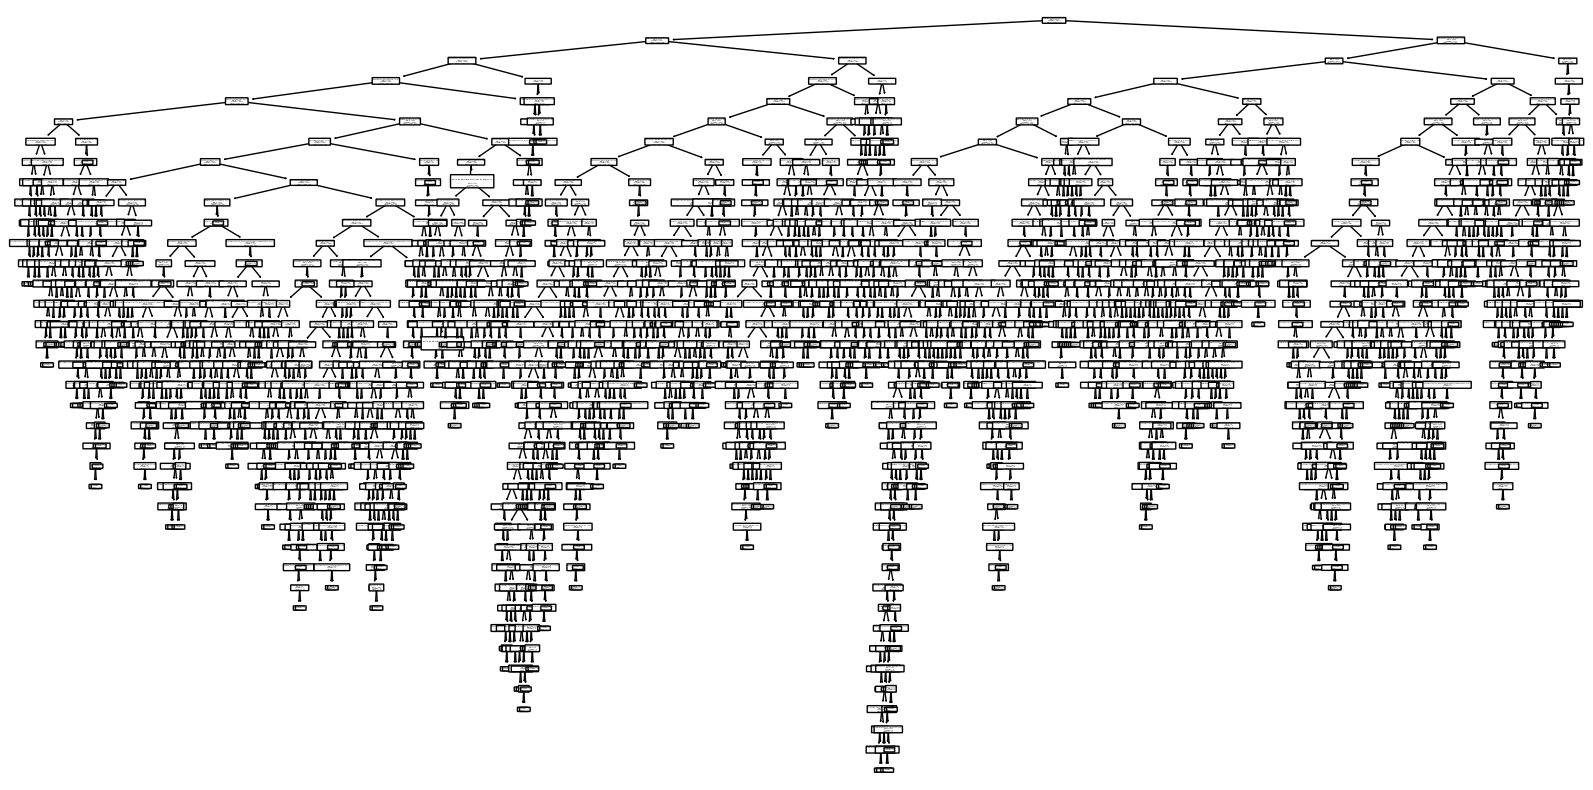

In [208]:
# Plot the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (20, 10))
plot_tree(decision_tree = simple_class_tree, feature_names=x_train.columns.tolist(), max_depth = None, rounded = True)
plt.show()

In [209]:
# Training Kappa
simple_class_tree_pred_train = simple_class_tree.predict(x_train)
print(simple_class_tree_pred_train)
Kappa_train_simple_class_tree = cohen_kappa_score(y1 = simple_class_tree_pred_train, y2 = y_train)
print(Kappa_train_simple_class_tree)

[1 0 1 ... 0 0 0]
0.9985381053939467


In [210]:
# Testing Kappa
simple_class_tree_pred_test = simple_class_tree.predict(x_test)
print(simple_class_tree_pred_test)
Kappa_test_simple_class_tree = cohen_kappa_score(y1 = simple_class_tree_pred_test, y2 = y_test)
print(Kappa_test_simple_class_tree)

[0 0 0 ... 0 0 1]
0.3173763496618146


In [211]:
unpruned_tree_leaf_nodes = simple_class_tree.tree_.n_leaves # The total number of leaves in the fully grown tree
print(unpruned_tree_leaf_nodes)

1849


In [212]:
## Tree Pruning
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold

# 4.1 Define the estimator
simple_class_tree_estimator = DecisionTreeClassifier(criterion = 'gini',  
                                    min_samples_split = 2, 
                                    min_samples_leaf = 1,
                                    max_depth = None,
                                    max_leaf_nodes = None,
                                    max_features = x_train.shape[1],
                                    random_state=123,
                                    ccp_alpha = 0.0)

kf_simple_class_tree = KFold(n_splits = 10, shuffle = True, random_state = 42)

unpruned_tree_leaf_nodes = simple_class_tree.tree_.n_leaves # The total number of leaves in the fully grown tree
print(unpruned_tree_leaf_nodes)

param_grid_class_tree = {'max_leaf_nodes': list(range(1, 1850,50))}
param_grid_class_tree

1849


{'max_leaf_nodes': [1,
  51,
  101,
  151,
  201,
  251,
  301,
  351,
  401,
  451,
  501,
  551,
  601,
  651,
  701,
  751,
  801,
  851,
  901,
  951,
  1001,
  1051,
  1101,
  1151,
  1201,
  1251,
  1301,
  1351,
  1401,
  1451,
  1501,
  1551,
  1601,
  1651,
  1701,
  1751,
  1801]}

In [213]:
cv_class_tree_pruning = GridSearchCV(estimator = simple_class_tree_estimator,
                              param_grid = param_grid_class_tree, 
                              scoring = 'balanced_accuracy',
                              cv = kf_simple_class_tree) 
cv_class_tree_pruning.fit(x_train, y_train)
# The balanced accuracy in binary and multiclass classification problems can deal with imbalanced datasets by 
# taking into account not only the % of correctly classified observations but also the % of misclassified ones.
# This scoring metric can closely minic the idea of Kappa score. 

# Output the best max_leaf_nodes and the corresponding cross-validation score
print(cv_class_tree_pruning.best_params_, cv_class_tree_pruning.best_score_) 

{'max_leaf_nodes': 201} 0.6888936402526731


/Users/mirandanoren/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 370.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mirandanoren/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mirandanoren/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/Users/mirandanoren/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/U

In [214]:
simple_class_tree_pruned = DecisionTreeClassifier(criterion = 'gini',  
                                    min_samples_split = 2, 
                                    min_samples_leaf = 1,
                                    max_depth = None,
                                    max_leaf_nodes = 201,
                                    max_features = x_train.shape[1],
                                    random_state=123,
                                    ccp_alpha = 0.0).fit(x_train, y_train)

In [215]:
# 4.6 Training Kappa
simple_class_tree_pruned_pred_train = simple_class_tree_pruned.predict(x_train)
print(simple_class_tree_pruned_pred_train)
Kappa_train_simple_class_tree_pruned = cohen_kappa_score(y1 = simple_class_tree_pruned_pred_train, y2 = y_train)
print(Kappa_train_simple_class_tree_pruned)

[1 0 0 ... 0 0 0]
0.6028939488776622


In [216]:
# 4.7 Test Kappa
simple_class_tree_pruned_pred_test = simple_class_tree_pruned.predict(x_test)
print(simple_class_tree_pruned_pred_test)
Kappa_test_simple_class_tree_pruned = cohen_kappa_score(y1 = simple_class_tree_pruned_pred_test, y2 = y_test)
print(Kappa_test_simple_class_tree_pruned)

[0 0 0 ... 1 0 1]
0.3984725166964145


In [217]:
# Classification trees with Bagging
from sklearn.ensemble import RandomForestClassifier # Import RF algorithm for the classification family

# 5.1 Fit a Bagged classification tree

bag_class_tree = RandomForestClassifier(n_estimators=500, 
                                        criterion= 'gini', 
                                        max_depth = None,
                                        min_samples_split = 2,
                                        min_samples_leaf = 1, 
                                        max_leaf_nodes = None,
                                        max_features= x_train.shape[1], 
                                        bootstrap=True,
                                        max_samples = x_train.shape[0],
                                        random_state = 42).fit(x_train, y_train)

In [218]:
Gini_reduction = bag_class_tree.feature_importances_
# The output shows the impurity-based feature importances. 
# The importance of a feature is computed as the total reduction of the Gini index brought by that feature.
# The lower the Gini index is, the less impure the node is, and the better the split is.
# Therefore, the more reduction of Gini index that a feature can bring, the more reduction of node impurity that feature
#   can bring, the more important that feature is. 
# Do cross-validation
# Create a feature importance data frame
feature_importance_dict = {'feature_name': x_train.columns, 'Gini_reduction': Gini_reduction}
feature_importance_df = pd.DataFrame(feature_importance_dict).sort_values(by = 'Gini_reduction', ascending=False)
print(feature_importance_df)

                                         feature_name  Gini_reduction
0                           Total Event Participation        0.149381
2                           School 1 GPA Recalculated        0.126246
3                                       ACT Composite        0.084951
1                              Count of Campus Visits        0.069308
31                     Decision Plan_Early Decision I        0.052996
4                                      Academic Index        0.029780
32                    Decision Plan_Early Decision II        0.020145
5                  Intend to Apply for Financial Aid?        0.020081
60              Academic Interest 1_School of Science        0.018277
22                             Religion_Not specified        0.015797
17                                 Religion_Christian        0.014931
29                       Decision Plan_Early Action I        0.014313
61  Academic Interest 1_Social Sciences and Civic ...        0.013421
6                   

In [219]:
import math
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold

# 5.5.1 Define cross-validation data splitting strategy
kf_bag_class_tree = KFold(n_splits = 2, shuffle = True, random_state = 42)
bag_class_tree_estimator = RandomForestClassifier(n_estimators=500, 
                                        criterion='gini', 
                                        max_depth = None,
                                        min_samples_split = 2,
                                        min_samples_leaf = 1, 
                                        max_leaf_nodes = None,
                                        max_features= x_train.shape[1], 
                                        bootstrap=True,
                                        max_samples = math.ceil(x_train.shape[0] * 0.5) -1,
                                        random_state = 42)

In [220]:
param_grid_bag_class_tree = {'max_leaf_nodes': list(range(2, 1850, 300))}
cv_bag_class_tree = GridSearchCV(estimator = bag_class_tree_estimator,
                              param_grid = param_grid_bag_class_tree, 
                              scoring = 'balanced_accuracy',
                              cv = kf_bag_class_tree,
                              n_jobs = -1) #Run All CPUs
cv_bag_class_tree.fit(x_train, y_train)

# Output the best max_leaf_nodes and the corresponding cross-validation score
print(cv_bag_class_tree.best_params_, cv_bag_class_tree.best_score_) 

{'max_leaf_nodes': 302} 0.6841700459956239


In [221]:
bag_class_tree_best = RandomForestClassifier(n_estimators=500, 
                                        criterion='gini', 
                                        max_depth = None,
                                        min_samples_split = 2,
                                        min_samples_leaf = 1, 
                                        max_leaf_nodes = 302,
                                        max_features= x_train.shape[1], 
                                        bootstrap=True,
                                        max_samples = x_train.shape[0],
                                        random_state = 42).fit(x_train, y_train)

In [222]:
bag_class_tree_pred_train = bag_class_tree_best.predict(x_train)
print(bag_class_tree_pred_train)
Kappa_train_bag_class_tree = cohen_kappa_score(y1 = bag_class_tree_pred_train, y2 = y_train)
print(Kappa_train_bag_class_tree)

[1 0 0 ... 0 0 0]
0.7293748415375578


In [223]:
bag_class_tree_pred_test = bag_class_tree_best.predict(x_test)
print(bag_class_tree_pred_test)
Kappa_test_bag_class_tree = cohen_kappa_score(y1 = bag_class_tree_pred_test, y2 = y_test)
print(Kappa_test_bag_class_tree)

[0 0 0 ... 1 0 1]
0.42951436606050564


In [224]:
# Classification with Random Forest
import math
kf_rf_class_tree = KFold(n_splits = 2, shuffle = True, random_state = 42)
rf_class_tree_estimator = RandomForestClassifier(n_estimators=500, 
                                        criterion='gini', 
                                        max_depth = None,
                                        min_samples_split = 2,
                                        min_samples_leaf = 1, 
                                        max_leaf_nodes = None,
                                        max_features= x_train.shape[1], 
                                        bootstrap=True,
                                        max_samples = math.ceil(x_train.shape[0]*0.5)-1,
                                        random_state = 42)
param_grid_rf_class_tree = {'max_leaf_nodes': list(range(2,1850,300)) ,
                          'max_features': list(range(1, x_train.shape[1], 50))}
 

In [225]:
cv_rf_class_tree = GridSearchCV(estimator = rf_class_tree_estimator,
                              param_grid = param_grid_rf_class_tree, 
                              scoring = 'balanced_accuracy',
                              cv = kf_rf_class_tree,
                              n_jobs = -1) 
cv_rf_class_tree.fit(x_train, y_train)

# Output the best max_leaf_nodes and the corresponding cross-validation score
print(cv_rf_class_tree.best_params_, cv_rf_class_tree.best_score_) 

{'max_features': 51, 'max_leaf_nodes': 302} 0.6867285928197602


In [226]:
rf_class_tree_best = RandomForestClassifier(n_estimators=500, 
                                        criterion='gini', 
                                        max_depth = None,
                                        min_samples_split = 2,
                                        min_samples_leaf = 1, 
                                        max_leaf_nodes = 302,
                                        max_features= 51, 
                                        bootstrap=True,
                                        max_samples = x_train.shape[0],
                                        random_state = 42).fit(x_train, y_train)

In [227]:
rf_class_tree_best_pred_train = rf_class_tree_best.predict(x_train)
Kappa_train_rf_class_tree_best = cohen_kappa_score(y1 = rf_class_tree_best_pred_train, y2 = y_train)
print(Kappa_train_rf_class_tree_best)
rf_class_tree_best_pred_test = rf_class_tree_best.predict(x_test)
Kappa_test_rf_class_tree_best = cohen_kappa_score(y1 = rf_class_tree_best_pred_test, y2 = y_test)
print(Kappa_test_rf_class_tree_best)

0.7182870386124096
0.4266224879989271


In [228]:
# Classification with Boosting
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold 

# 7.2.1 Define the estimator
Tree_class_boosting_estimator = GradientBoostingClassifier(loss = 'log_loss',
                                                 learning_rate = 0.01,
                                                 max_features = x_train.shape[1],
                                                 criterion = 'friedman_mse',
                                                 random_state = 42)


In [229]:
kf_boosting = KFold(n_splits = 2, shuffle = True, random_state = 42)

# 7.2.3 Define a search grid
# The number of simple trees to grow begins at 100, ends at 5000, and increments by 100.
# For the number of splits in a simple tree, a small number is typically sufficient. A common range is 1 to 6.
param_grid_boosting = {'n_estimators': list(range(100, 5001, 100)),
                        'max_leaf_nodes': range(2,1850,500)
}


In [230]:
cv_tree_class_boosting = GridSearchCV(estimator = Tree_class_boosting_estimator,
                                      param_grid = param_grid_boosting, 
                                      scoring = 'neg_log_loss',
                                      cv = kf_boosting, 
                                      n_jobs = -1).fit(x_train, y_train)

In [231]:
print("Best Parameters: ", cv_tree_class_boosting.best_params_)
print("Best Score: ", cv_tree_class_boosting.best_score_)

Best Parameters:  {'max_leaf_nodes': 502, 'n_estimators': 1000}
Best Score:  -0.3751230949132195


In [232]:
Tree_class_boost_best = GradientBoostingClassifier(loss = 'log_loss',
                                                 learning_rate = 0.01,
                                                 n_estimators = 1000,
                                                 max_leaf_nodes = 502,
                                                 max_features = x_train.shape[1],
                                                 criterion = 'friedman_mse',
                                                 random_state = 42).fit(x_train, y_train)


In [233]:
fridedman_mse_reduction = Tree_class_boost_best.feature_importances_

# Create a feature importance data frame
feature_importance_dict = {'feature_name': x_train.columns, 'fridedman_mse_reduction': fridedman_mse_reduction}
feature_importance_df = pd.DataFrame(feature_importance_dict).sort_values(by = 'fridedman_mse_reduction', ascending=False)
print(feature_importance_df)

                                         feature_name  fridedman_mse_reduction
0                           Total Event Participation                 0.410016
1                              Count of Campus Visits                 0.169215
31                     Decision Plan_Early Decision I                 0.141734
32                    Decision Plan_Early Decision II                 0.060544
3                                       ACT Composite                 0.040525
4                                      Academic Index                 0.029653
36                                    Athlete_Athlete                 0.014717
2                           School 1 GPA Recalculated                 0.014156
67                              Merit Award_Full Ride                 0.011677
37                                Athlete_Non-Athlete                 0.009843
44                             Sport 1 Sport_No Sport                 0.007581
29                       Decision Plan_Early Action 

In [234]:
print(Tree_class_boost_best.predict_proba(x_test))
pred_prob_train = Tree_class_boost_best.predict_proba(x_train)[:,1]
print(pred_prob_train)

[[0.55264166 0.44735834]
 [0.94054357 0.05945643]
 [0.94385641 0.05614359]
 ...
 [0.3453124  0.6546876 ]
 [0.83960797 0.16039203]
 [0.21032975 0.78967025]]
[0.43516862 0.04333094 0.12456465 ... 0.20058104 0.53152262 0.06430092]


In [235]:
# 7.5 Output predicted class label for each observation in test data
print(Tree_class_boost_best.classes_)
print(Tree_class_boost_best.predict_proba(x_test))
pred_prob_test = Tree_class_boost_best.predict_proba(x_test)[:,1]
print(pred_prob_test)

[0 1]
[[0.55264166 0.44735834]
 [0.94054357 0.05945643]
 [0.94385641 0.05614359]
 ...
 [0.3453124  0.6546876 ]
 [0.83960797 0.16039203]
 [0.21032975 0.78967025]]
[0.44735834 0.05945643 0.05614359 ... 0.6546876  0.16039203 0.78967025]


In [236]:
# The cut-off probability begins at 0.1, increments by 0.01, and ends at 0.9.
Kappa_test_boost = []
cut_off_prob = []


for prob in np.arange(0.1, 0.91, 0.01):
    cut_off_prob.append(round(prob, 2))
    y_test_pred_class = np.where(pred_prob_test >= prob, 1, 0)
    Kappa = cohen_kappa_score(y1 = y_test_pred_class, y2 = y_test) 
    Kappa_test_boost.append(Kappa)
    
print(Kappa_test_boost.index(max(Kappa_test_boost))) # Get the index of the largest test Kappa
print(cut_off_prob[Kappa_test_boost.index(max(Kappa_test_boost))]) # Get the corresponding cut-off probability
print(max(Kappa_test_boost))

20
0.3
0.4713655635823705


In [237]:
# Training Kappa
pred_prob_train = Tree_class_boost_best.predict_proba(x_train)[:,1]
pred_class_train = np.where(pred_prob_train >= 0.3, 1, 0)
Kappa_train_boost = cohen_kappa_score(y1 = pred_class_train, y2 = y_train)
print(Kappa_train_boost)

0.506202336498107


In [238]:
#7.8 Test Kappa
pred_prob_test = Tree_class_boost_best.predict_proba(x_test)[:,1]
pred_class_test = np.where(pred_prob_test >= 0.28, 1, 0)
Kappa_test_boost = cohen_kappa_score(y1 = pred_class_test, y2 = y_test)
print(Kappa_test_boost)

0.46430486455868925
